In [ ]:
#2203A52127
#Gattu.Vamshi krishna
#Batch-32
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
data = pd.read_csv('/content/bodyfat.csv')
print(data)
data.head()
data.shape
data.info()
data.describe()

     Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   
1     1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   
2     1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   
3     1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   
4     1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   
..       ...      ...  ...     ...     ...   ...    ...      ...    ...   
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0     59.0  37.3   21.9    32.0     27.4   17.1  

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [ ]:
duplicate_rows = data[data.duplicated()]

# Print duplicate rows if any
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found")

# Drop duplicate rows if any
if not duplicate_rows.empty:
    data.drop_duplicates(inplace=True)
    print("Duplicate rows dropped")
else:
    print("No duplicate rows were dropped")

# Drop rows with missing values
data.dropna(inplace=True)
# Convert height from inches to meters
data['Height_m'] = data['Height'] * 0.0254  # 1 inch = 0.0254 meters

# Convert weight from lbs to kg
data['Weight_kg'] = data['Weight'] * 0.453592  # 1 lb = 0.453592 kg

# Calculate BMI
data['BMI'] = data['Weight_kg'] / (data['Height_m'] ** 2)
# Swap 'Height' and 'Weight' columns
data['Height'], data['Weight'] = data['Weight'], data['Height']

# Display the first few rows to verify the swap
data.head()

No duplicate rows found
No duplicate rows were dropped


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Height_m,Weight_kg,BMI
0,1.0708,12.3,23,67.75,154.25,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,1.72085,69.966566,23.626779
1,1.0853,6.1,22,72.25,173.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,1.83515,78.584814,23.334338
2,1.0414,25.3,22,66.25,154.00,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,1.68275,69.853168,24.668737
3,1.0751,10.4,26,72.25,184.75,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,1.83515,83.801122,24.883227
4,1.0340,28.7,24,71.25,184.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,1.80975,83.574326,25.517358


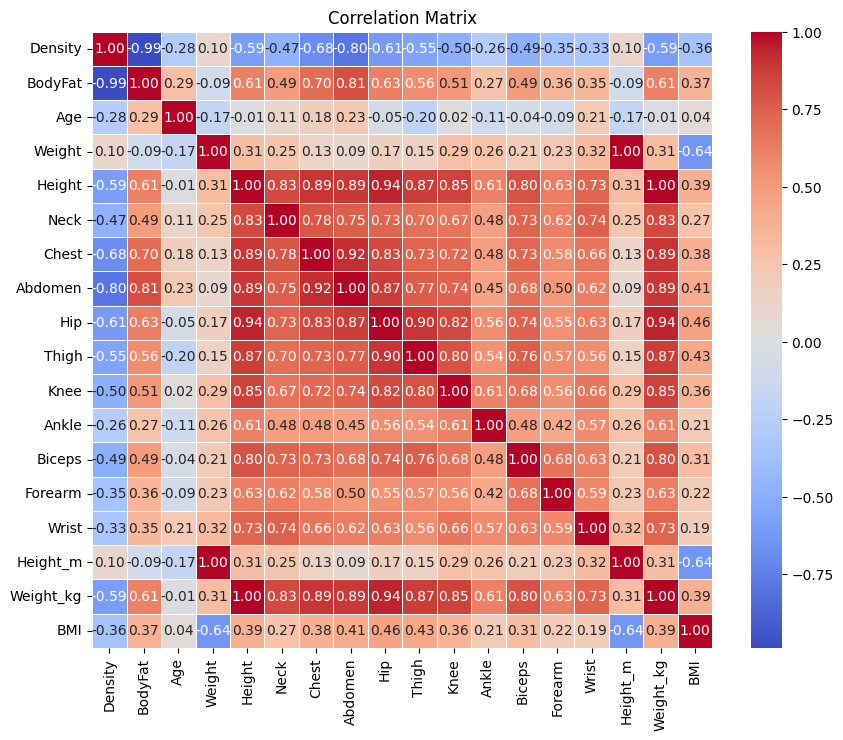

In [ ]:
# Display correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

     Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0     1.0708   23   67.75  154.25  36.2   93.1     85.2   94.5   59.0  37.3   
1     1.0853   22   72.25  173.25  38.5   93.6     83.0   98.7   58.7  37.3   
2     1.0414   22   66.25  154.00  34.0   95.8     87.9   99.2   59.6  38.9   
3     1.0751   26   72.25  184.75  37.4  101.8     86.4  101.2   60.1  37.3   
4     1.0340   24   71.25  184.25  34.4   97.3    100.0  101.9   63.2  42.2   
..       ...  ...     ...     ...   ...    ...      ...    ...    ...   ...   
247   1.0736   70   67.00  134.25  34.9   89.2     83.6   88.8   49.6  34.8   
248   1.0236   72   69.75  201.00  40.9  108.5    105.0  104.5   59.6  40.8   
249   1.0328   72   66.00  186.75  38.9  111.1    111.5  101.7   60.3  37.3   
250   1.0399   72   70.50  190.75  38.9  108.3    101.3   97.8   56.0  41.6   
251   1.0271   74   70.00  207.50  40.8  112.4    108.5  107.1   59.3  42.2   

     Ankle  Biceps  Forearm  Wrist  Height_m  Weigh

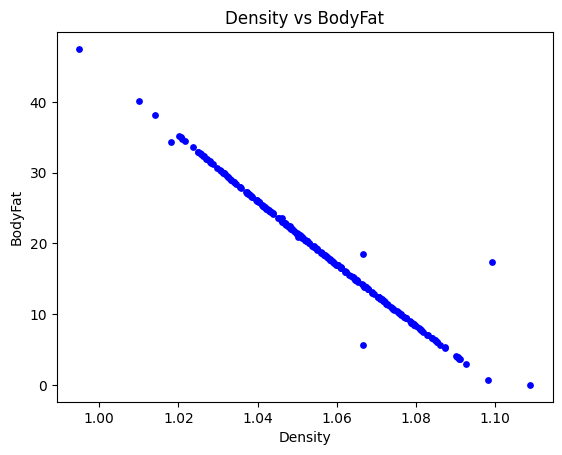

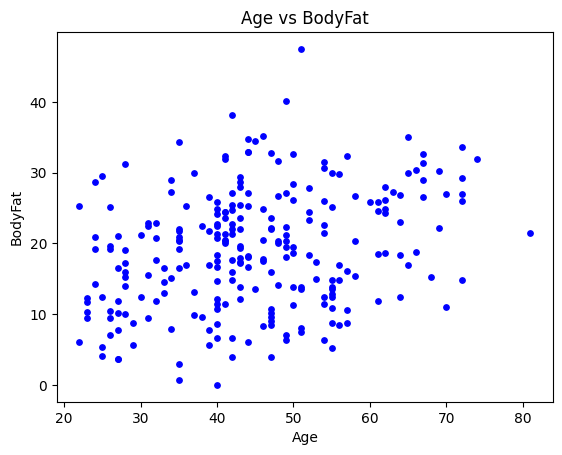

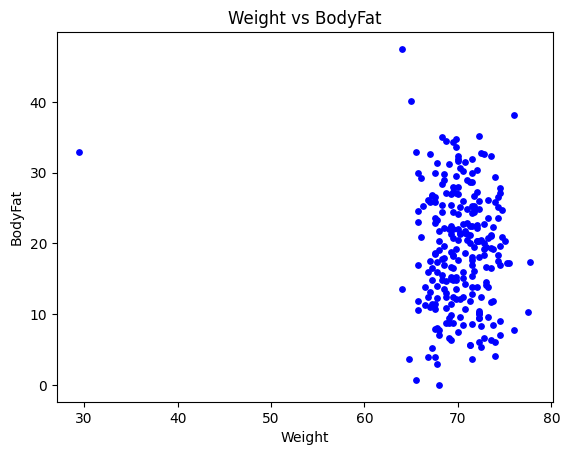

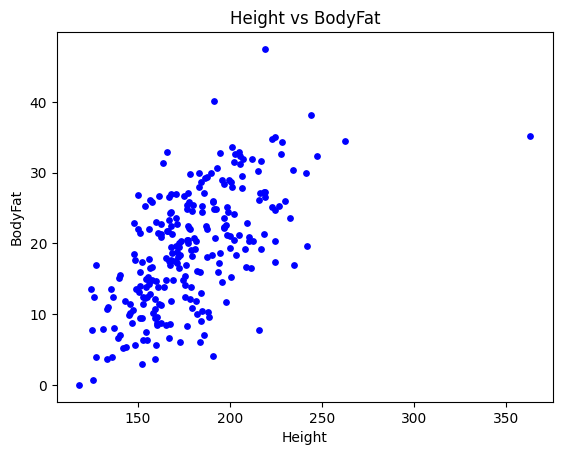

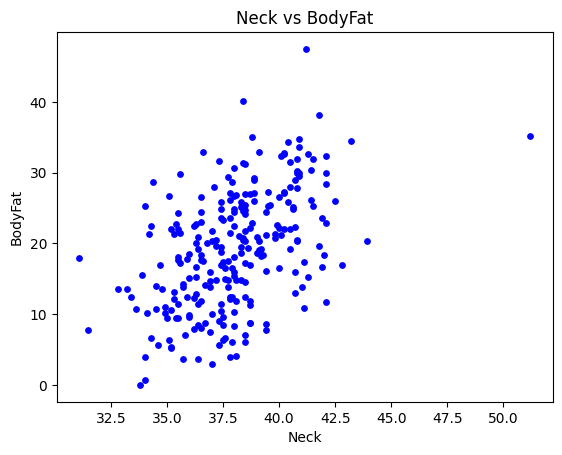

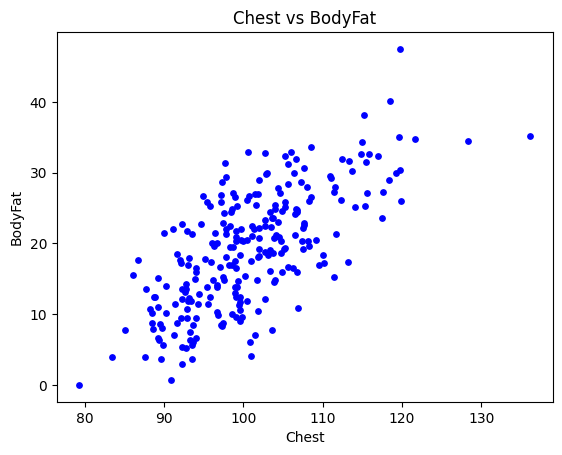

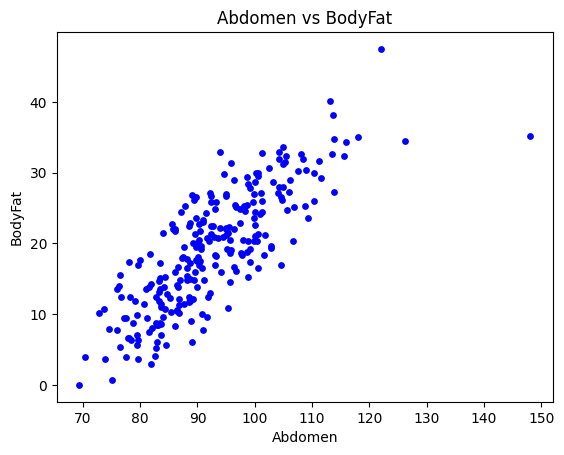

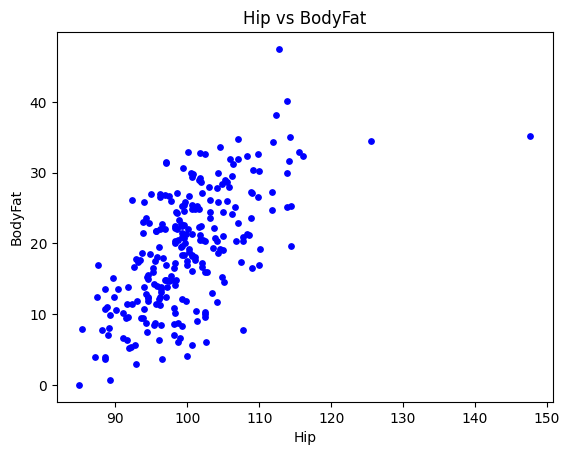

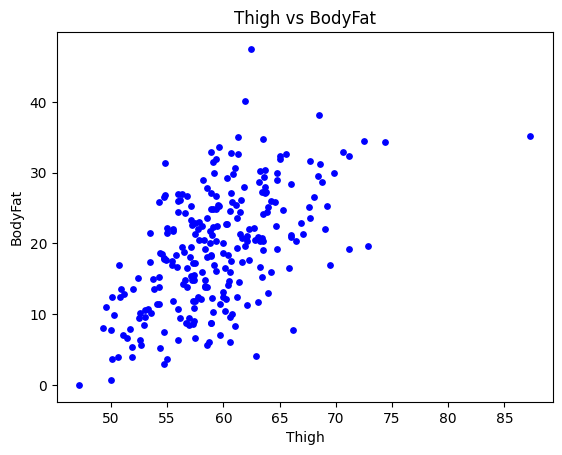

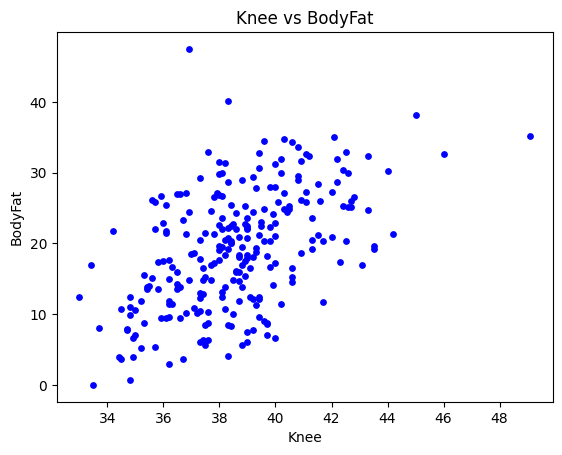

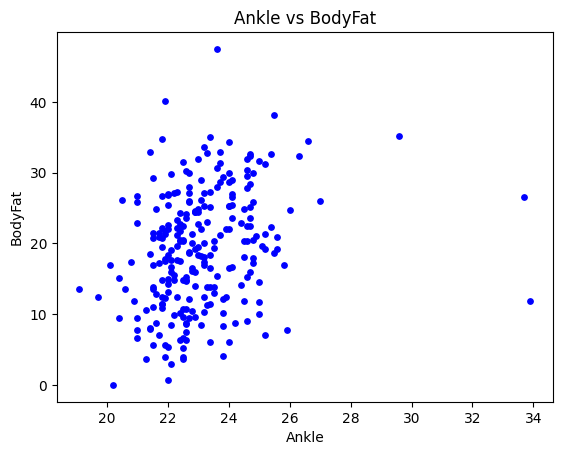

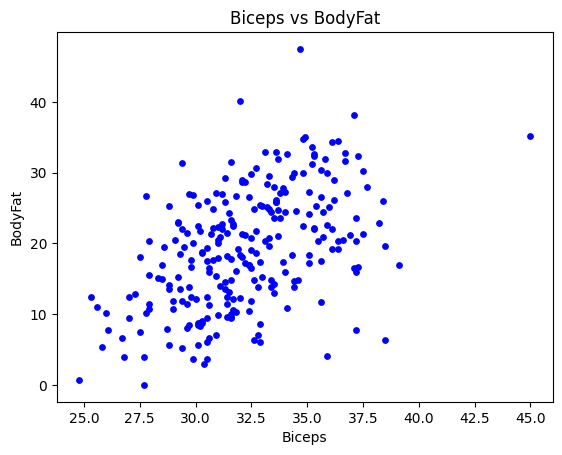

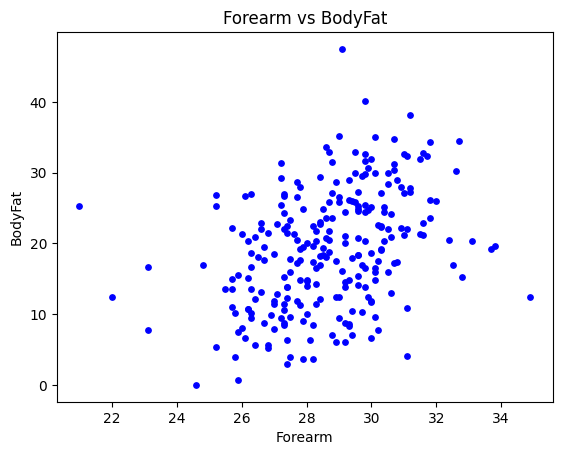

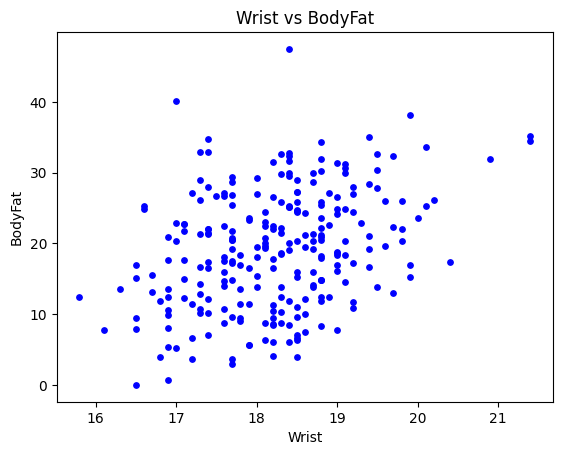

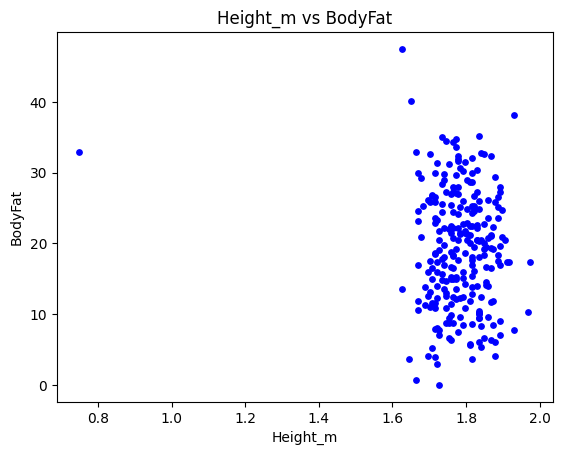

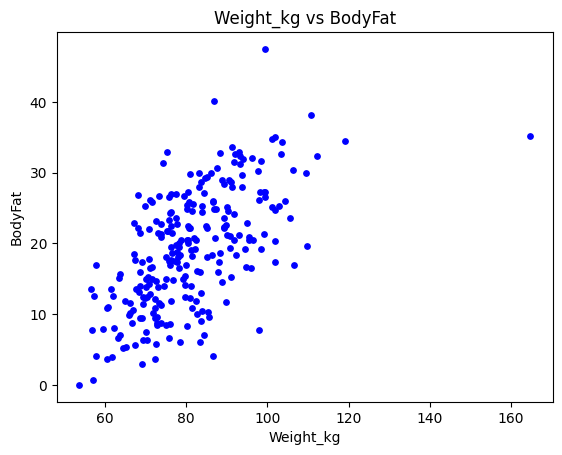

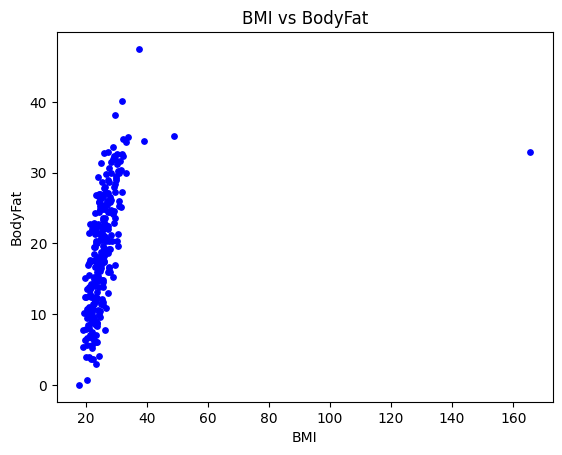

In [ ]:
# Define features (X) and target variable (y)
features = data.drop(columns=['BodyFat'])  # Features
target_variable = data['BodyFat']  # Target variable
print(features)
print(target_variable)

 #plotting graphs
for feature in X:
    plt.scatter(X[feature],y,c='blue',s=15)
    plt.xlabel(feature)
    plt.ylabel('BodyFat')
    plt.title(f'{feature} vs BodyFat')
    plt.show()

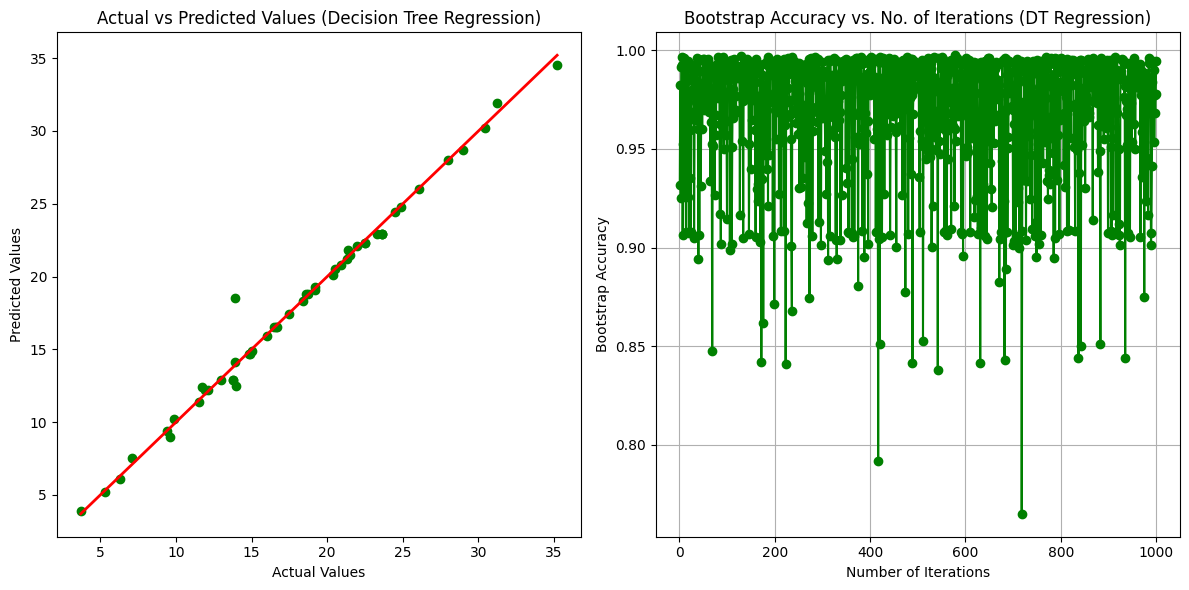

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import resample
# Split the data into training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(features, target_variable, test_size=0.2, random_state=42)

# Initialize Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree Regressor
dt_regressor.fit(X_train_dt, y_train_dt)

# Make predictions
y_pred_dt = dt_regressor.predict(X_test_dt)

# Calculate evaluation metrics
mse_dt = mean_squared_error(y_test_dt, y_pred_dt)
rmse_dt = mean_squared_error(y_test_dt, y_pred_dt, squared=False)
mae_dt = mean_absolute_error(y_test_dt, y_pred_dt)
r2_dt = r2_score(y_test_dt, y_pred_dt)

# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_dt, y_pred_dt, color='green')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Decision Tree Regression)")
plt.plot([min(y_test_dt), max(y_test_dt)], [min(y_test_dt), max(y_test_dt)], linestyle='-', color='red', linewidth=2)

# Decision Tree Regression Bootstrap
plt.subplot(1, 2, 2)
n_iterations = 1000
bootstrap_scores_dt = []
for i in range(n_iterations):
    X_boot_dt, y_boot_dt = resample(X_train_dt, y_train_dt)
    dt_regressor.fit(X_boot_dt, y_boot_dt)
    y_pred_boot_dt = dt_regressor.predict(X_test_dt)
    bootstrap_scores_dt.append(r2_score(y_test_dt, y_pred_boot_dt))

plt.plot(range(1, n_iterations + 1), bootstrap_scores_dt, marker='o', linestyle='-', color='green')
plt.xlabel("Number of Iterations")
plt.ylabel("Bootstrap Accuracy")
plt.title("Bootstrap Accuracy vs. No. of Iterations (DT Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


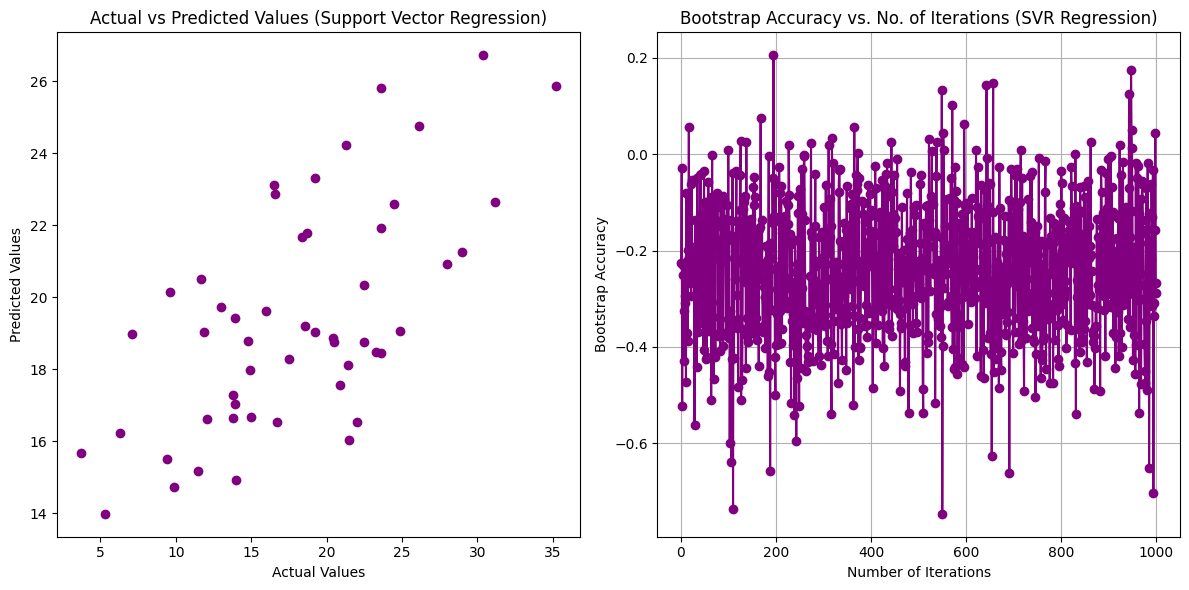

In [ ]:
# Support Vector Regression
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(features, target_variable, test_size=0.2, random_state=42)
svr_regressor = SVR()
svr_regressor.fit(X_train_svr, y_train_svr)
y_pred_svr = svr_regressor.predict(X_test_svr)
mse_svr = mean_squared_error(y_test_svr, y_pred_svr)
rmse_svr = mean_squared_error(y_test_svr, y_pred_svr, squared=False)
mae_svr = mean_absolute_error(y_test_svr, y_pred_svr)
r2_svr = r2_score(y_test_svr, y_pred_svr)
# Support Vector Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_svr, y_pred_svr, color='purple')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Support Vector Regression)")
# Support Vector Regression Bootstrap
plt.subplot(1, 2, 2)
n_iterations = 1000
bootstrap_scores_svr = []
y_pred_all_svr = svr_regressor.predict(X_test_svr)
for i in range(n_iterations):
    indices_svr = np.random.choice(len(X_test_svr), size=len(X_test_svr), replace=True)
    y_pred_boot_svr = y_pred_all_svr[indices_svr]
    bootstrap_scores_svr.append(r2_score(y_test_svr, y_pred_boot_svr))
plt.plot(range(1, n_iterations + 1), bootstrap_scores_svr, marker='o', linestyle='-', color='purple')
plt.xlabel("Number of Iterations")
plt.ylabel("Bootstrap Accuracy")
plt.title("Bootstrap Accuracy vs. No. of Iterations (SVR Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

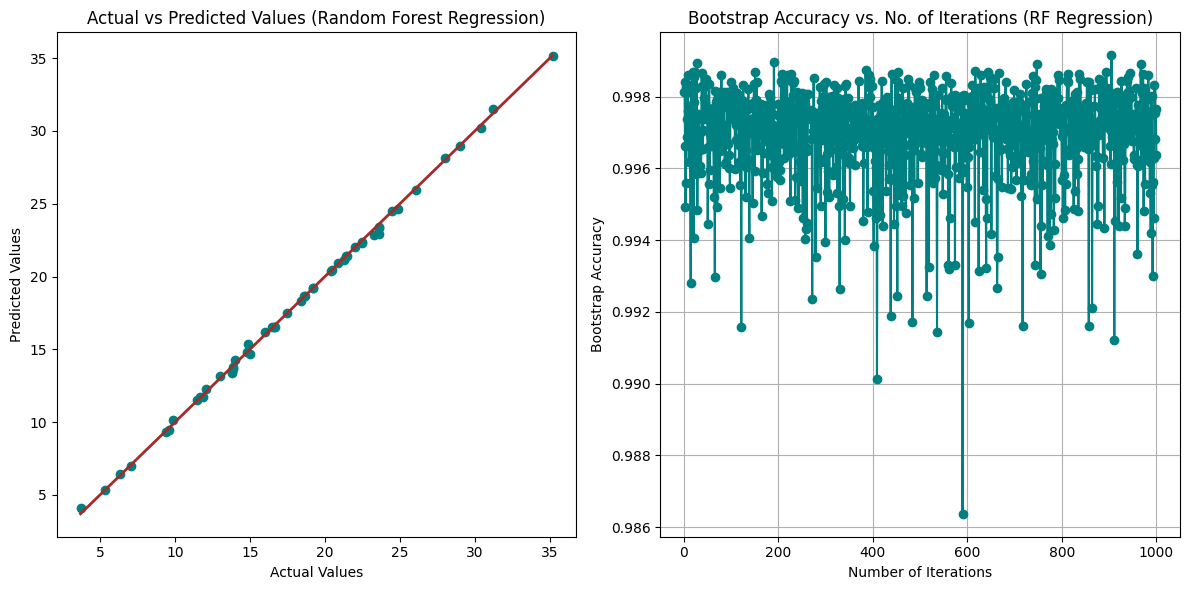

In [ ]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(features,target_variable, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_rf, y_train_rf)
y_pred_rf = rf_regressor.predict(X_test_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
rmse_rf = mean_squared_error(y_test_rf, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

# Random Forest Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_rf, y_pred_rf, color='teal')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Random Forest Regression)")
plt.plot([min(y_test_rf), max(y_test_rf)], [min(y_test_rf), max(y_test_rf)], linestyle='-', color='brown', linewidth=2)
# Random Forest Regression Bootstrap
plt.subplot(1, 2, 2)
n_iterations = 1000
bootstrap_scores_rf = []
for i in range(n_iterations):
    X_boot_rf, y_boot_rf = resample(X_train_rf, y_train_rf, n_samples=1000)
    rf_regressor.fit(X_boot_rf, y_boot_rf)
    y_pred_boot_rf = rf_regressor.predict(X_test_rf)
    bootstrap_scores_rf.append(r2_score(y_test_rf, y_pred_boot_rf))
plt.plot(range(1, n_iterations + 1), bootstrap_scores_rf, marker='o', linestyle='-', color='teal')
plt.xlabel("Number of Iterations")
plt.ylabel("Bootstrap Accuracy")
plt.title("Bootstrap Accuracy vs. No. of Iterations (RF Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


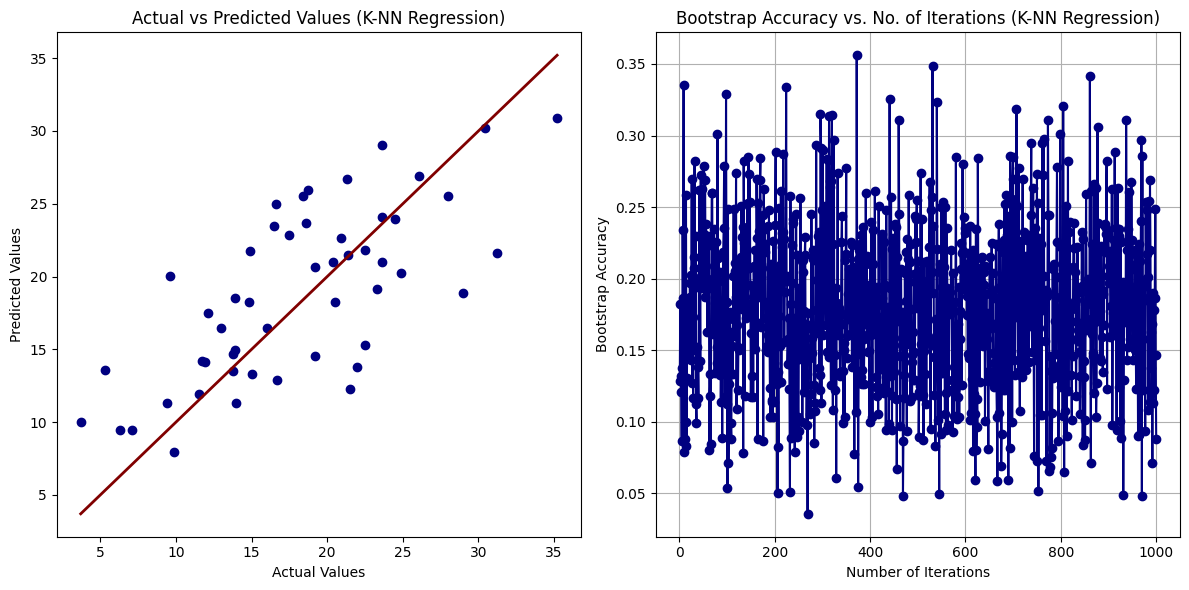

In [ ]:
# K-Nearest Neighbors Regression
from sklearn.neighbors import KNeighborsRegressor
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(features, target_variable, test_size=0.2, random_state=42)
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train_knn, y_train_knn)
y_pred_knn = knn_regressor.predict(X_test_knn)
mse_knn = mean_squared_error(y_test_knn, y_pred_knn)
rmse_knn = mean_squared_error(y_test_knn, y_pred_knn, squared=False)
mae_knn = mean_absolute_error(y_test_knn, y_pred_knn)
r2_knn = r2_score(y_test_knn, y_pred_knn)
# K-Nearest Neighbors Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_knn, y_pred_knn, color='navy')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (K-NN Regression)")
plt.plot([min(y_test_knn), max(y_test_knn)], [min(y_test_knn), max(y_test_knn)], linestyle='-', color='maroon', linewidth=2)
# K-Nearest Neighbors Regression Bootstrap
plt.subplot(1, 2, 2)
n_iterations = 1000
bootstrap_scores_knn = []
for i in range(n_iterations):
    X_boot_knn, y_boot_knn = resample(X_train_knn, y_train_knn, n_samples=1000)
    knn_regressor.fit(X_boot_knn, y_boot_knn)
    y_pred_boot_knn = knn_regressor.predict(X_test_knn)
    bootstrap_scores_knn.append(r2_score(y_test_knn, y_pred_boot_knn))
plt.plot(range(1, n_iterations + 1), bootstrap_scores_knn, marker='o', linestyle='-', color='navy')
plt.xlabel("Number of Iterations")
plt.ylabel("Bootstrap Accuracy")
plt.title("Bootstrap Accuracy vs. No. of Iterations (K-NN Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

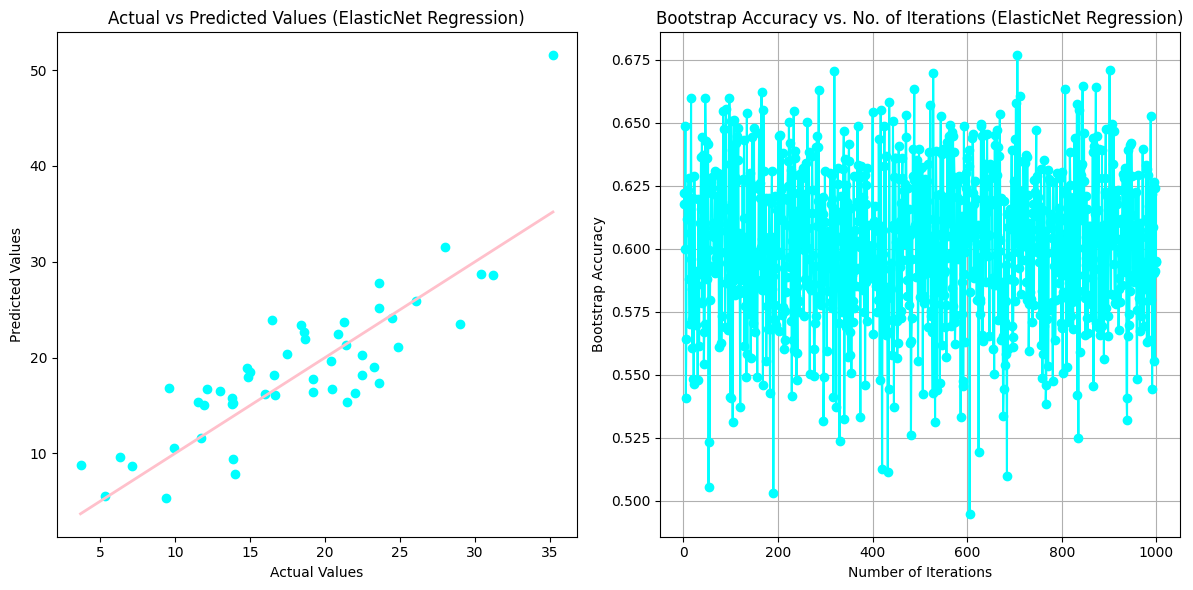

In [ ]:
# ElasticNet Regression
from sklearn.linear_model import ElasticNet
X_train_elastic, X_test_elastic, y_train_elastic, y_test_elastic = train_test_split(features,target_variable, test_size=0.2, random_state=42)
elasticnet_regressor = ElasticNet(max_iter=10000, alpha=0.1)
elasticnet_regressor.fit(X_train_elastic, y_train_elastic)
y_pred_elastic = elasticnet_regressor.predict(X_test_elastic)
mse_elastic = mean_squared_error(y_test_elastic, y_pred_elastic)
rmse_elastic = mean_squared_error(y_test_elastic, y_pred_elastic, squared=False)
mae_elastic = mean_absolute_error(y_test_elastic, y_pred_elastic)
r2_elastic = r2_score(y_test_elastic, y_pred_elastic)
# ElasticNet Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_elastic, y_pred_elastic, color='cyan')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (ElasticNet Regression)")
plt.plot([min(y_test_elastic), max(y_test_elastic)], [min(y_test_elastic), max(y_test_elastic)], linestyle='-', color='pink', linewidth=2)
# ElasticNet Regression Bootstrap
plt.subplot(1, 2, 2)
n_iterations = 1000
bootstrap_scores_elastic = []
for i in range(n_iterations):
    X_boot_elastic, y_boot_elastic = resample(X_train_elastic, y_train_elastic, n_samples=1000)
    elasticnet_regressor.fit(X_boot_elastic, y_boot_elastic)
    y_pred_boot_elastic = elasticnet_regressor.predict(X_test_elastic)
    bootstrap_scores_elastic.append(r2_score(y_test_elastic, y_pred_boot_elastic))
plt.plot(range(1, n_iterations + 1), bootstrap_scores_elastic, marker='o', linestyle='-', color='cyan')
plt.xlabel("Number of Iterations")
plt.ylabel("Bootstrap Accuracy")
plt.title("Bootstrap Accuracy vs. No. of Iterations (ElasticNet Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


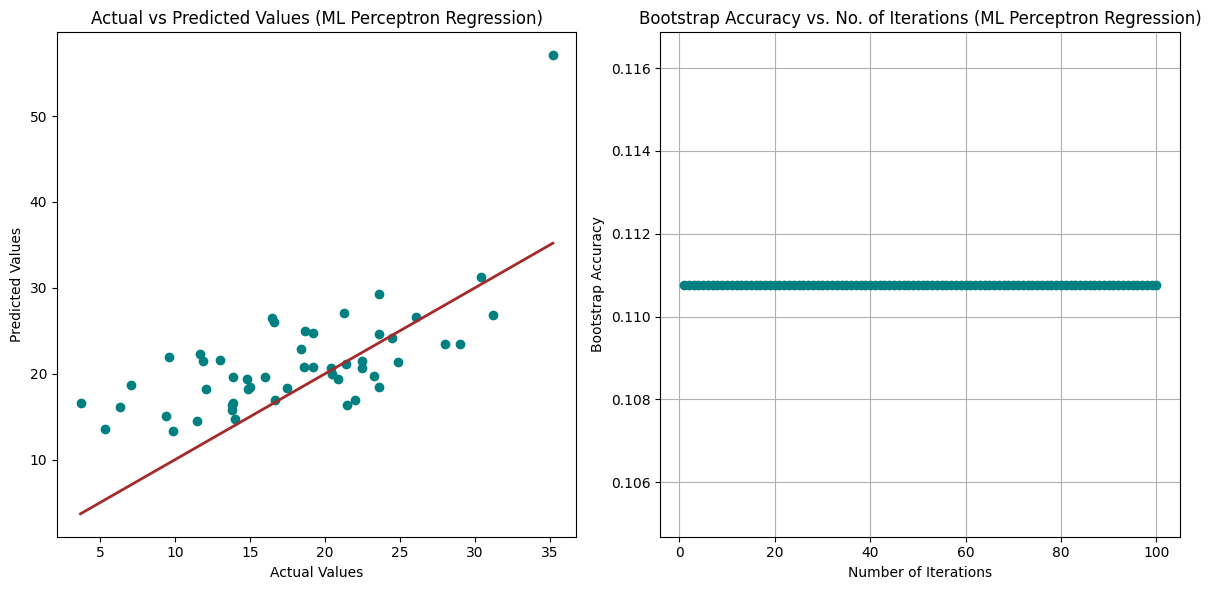

In [ ]:
# Multi-layer Perceptron Regression
from sklearn.neural_network import MLPRegressor
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(features,target_variable, test_size=0.2, random_state=42)
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100,), alpha=0.0001, max_iter=1000, random_state=42)
mlp_regressor.fit(X_train_mlp, y_train_mlp)
y_pred_mlp = mlp_regressor.predict(X_test_mlp)
mse_mlp = mean_squared_error(y_test_mlp, y_pred_mlp)
rmse_mlp = mean_squared_error(y_test_mlp, y_pred_mlp, squared=False)
mae_mlp = mean_absolute_error(y_test_mlp, y_pred_mlp)
r2_mlp = r2_score(y_test_mlp, y_pred_mlp)
# Multi-layer Perceptron Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_mlp, y_pred_mlp, color='teal')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (ML Perceptron Regression)")
plt.plot([min(y_test_mlp), max(y_test_mlp)], [min(y_test_mlp), max(y_test_mlp)], linestyle='-', color='brown', linewidth=2)
# Multi-layer Perceptron Regression Bootstrap
plt.subplot(1, 2, 2)
n_iterations_mlp = 100
bootstrap_scores_mlp = []
for i in range(n_iterations_mlp):
    mlp_regressor.fit(X_train_mlp, y_train_mlp)
    y_pred_boot_mlp = mlp_regressor.predict(X_test_mlp)
    bootstrap_scores_mlp.append(r2_score(y_test_mlp, y_pred_boot_mlp))
plt.plot(range(1, n_iterations_mlp + 1), bootstrap_scores_mlp, marker='o', linestyle='-', color='teal')
plt.xlabel("Number of Iterations")
plt.ylabel("Bootstrap Accuracy")
plt.title("Bootstrap Accuracy vs. No. of Iterations (ML Perceptron Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

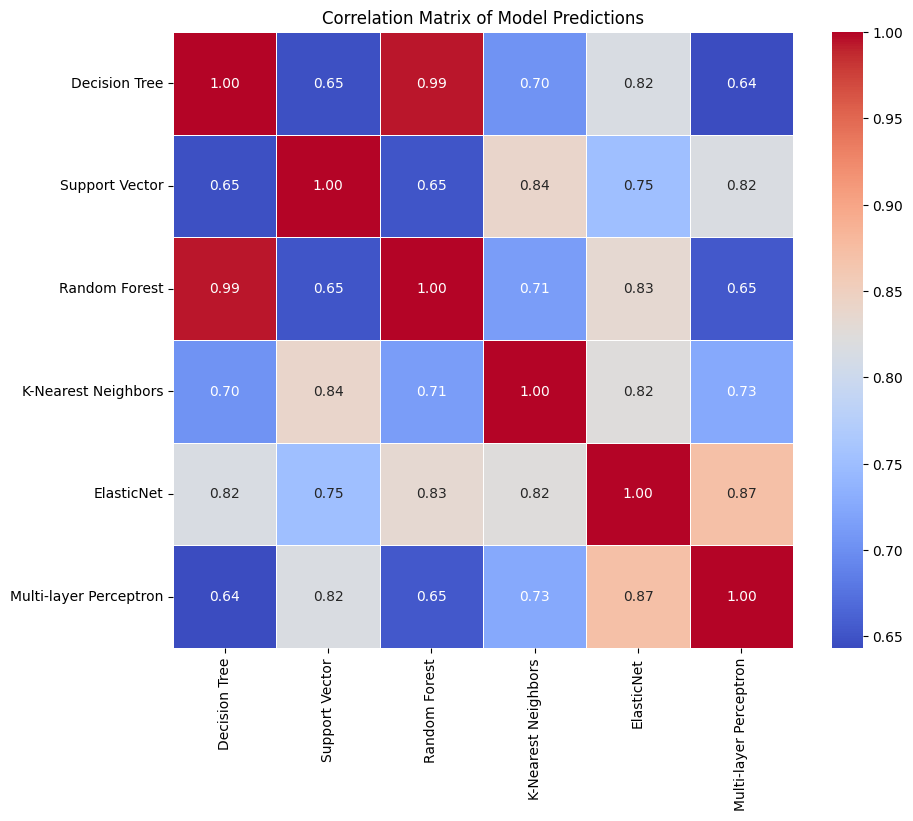

In [ ]:
predictions_df = pd.DataFrame({
    'Decision Tree': y_pred_dt,
    'Support Vector': y_pred_svr,
    'Random Forest': y_pred_rf,
    'K-Nearest Neighbors': y_pred_knn,
    'ElasticNet': y_pred_elastic,
    'Multi-layer Perceptron': y_pred_mlp
})
predictions_correlation_matrix = predictions_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(predictions_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Model Predictions')
plt.show()


In [ ]:
errors_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Support Vector', 'Random Forest', 'K-Nearest Neighbors', 'ElasticNet', 'Multi-layer Perceptron'],
    'MSE': [mse_dt, mse_svr, mse_rf, mse_knn, mse_elastic, mse_mlp],
    'RMSE': [rmse_dt, rmse_svr, rmse_rf, rmse_knn, rmse_elastic, rmse_mlp],
    'MAE': [mae_dt, mae_svr, mae_rf, mae_knn, mae_elastic, mae_mlp],
    'R2': [r2_dt, r2_svr, r2_rf, r2_knn, r2_elastic, r2_mlp]
})
print(errors_df)

                    Model        MSE      RMSE       MAE        R2
0           Decision Tree   0.582745  0.763377  0.368627  0.987473
1          Support Vector  30.542885  5.526562  4.651262  0.343419
2           Random Forest   0.046575  0.215814  0.158667  0.998999
3     K-Nearest Neighbors  24.276486  4.927117  3.945882  0.478128
4              ElasticNet  18.225150  4.269092  3.337129  0.608214
5  Multi-layer Perceptron  41.365089  6.431570  4.892654  0.110774


In [ ]:
from IPython.display import display
display(errors_df)
errors_table = errors_df.to_string(index=False)
print(errors_table)

,Model,MSE,RMSE,MAE,R2
0,Decision Tree,0.582745,0.763377,0.368627,0.987473
1,Support Vector,30.542885,5.526562,4.651262,0.343419
2,Random Forest,0.046575,0.215814,0.158667,0.998999
3,K-Nearest Neighbors,24.276486,4.927117,3.945882,0.478128
4,ElasticNet,18.225150,4.269092,3.337129,0.608214
5,Multi-layer Perceptron,41.365089,6.431570,4.892654,0.110774


                 Model       MSE     RMSE      MAE       R2
         Decision Tree  0.582745 0.763377 0.368627 0.987473
        Support Vector 30.542885 5.526562 4.651262 0.343419
         Random Forest  0.046575 0.215814 0.158667 0.998999
   K-Nearest Neighbors 24.276486 4.927117 3.945882 0.478128
            ElasticNet 18.225150 4.269092 3.337129 0.608214
Multi-layer Perceptron 41.365089 6.431570 4.892654 0.110774


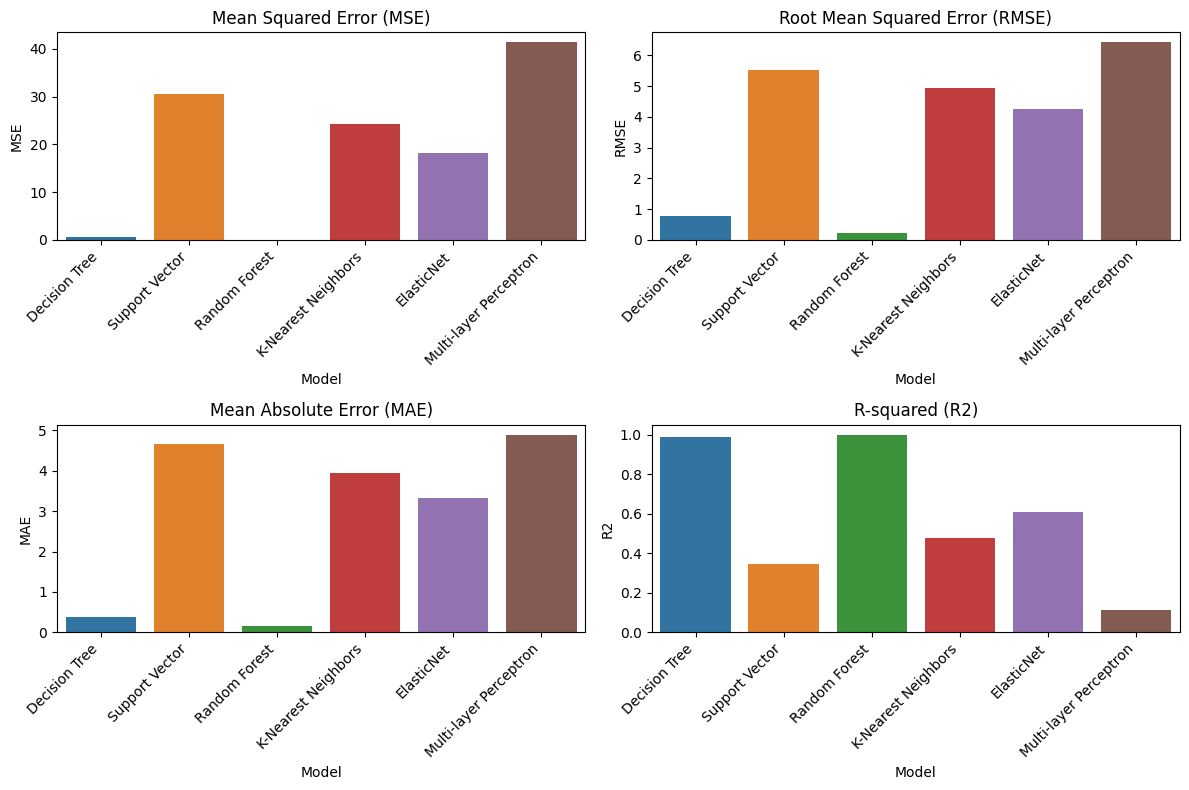

In [ ]:
errors_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Support Vector', 'Random Forest', 'K-Nearest Neighbors', 'ElasticNet', 'Multi-layer Perceptron'],
    'MSE': [mse_dt, mse_svr, mse_rf, mse_knn, mse_elastic, mse_mlp],
    'RMSE': [rmse_dt, rmse_svr, rmse_rf, rmse_knn, rmse_elastic, rmse_mlp],
    'MAE': [mae_dt, mae_svr, mae_rf, mae_knn, mae_elastic, mae_mlp],
    'R2': [r2_dt, r2_svr, r2_rf, r2_knn, r2_elastic, r2_mlp]
})
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='MSE', data=errors_df, hue='Model', legend=False)
plt.title('Mean Squared Error (MSE)')
plt.xticks(rotation=45, ha='right')
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='RMSE', data=errors_df, hue='Model', legend=False)
plt.title('Root Mean Squared Error (RMSE)')
plt.xticks(rotation=45, ha='right')
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='MAE', data=errors_df, hue='Model', legend=False)
plt.title('Mean Absolute Error (MAE)')
plt.xticks(rotation=45, ha='right')
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='R2', data=errors_df, hue='Model', legend=False)
plt.title('R-squared (R2)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
best_model = errors_df.iloc[errors_df[['MSE', 'RMSE', 'MAE']].idxmin()]
best_model = best_model.iloc[best_model['R2'].idxmax()]
print("Best Model based on error metrics:")
print(best_model)

Best Model based on error metrics:
Model    Random Forest
MSE           0.046575
RMSE          0.215814
MAE           0.158667
R2            0.998999
Name: 2, dtype: object
